In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(['Unnamed: 32'], axis=1)

##### Columns are grouped into sets reflecting measuremensts taken on three different sets
* Means
* Standard errors
* Worst values

##### These measurements were taken on 10 dimensions of a tumour including; radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal_dimension,

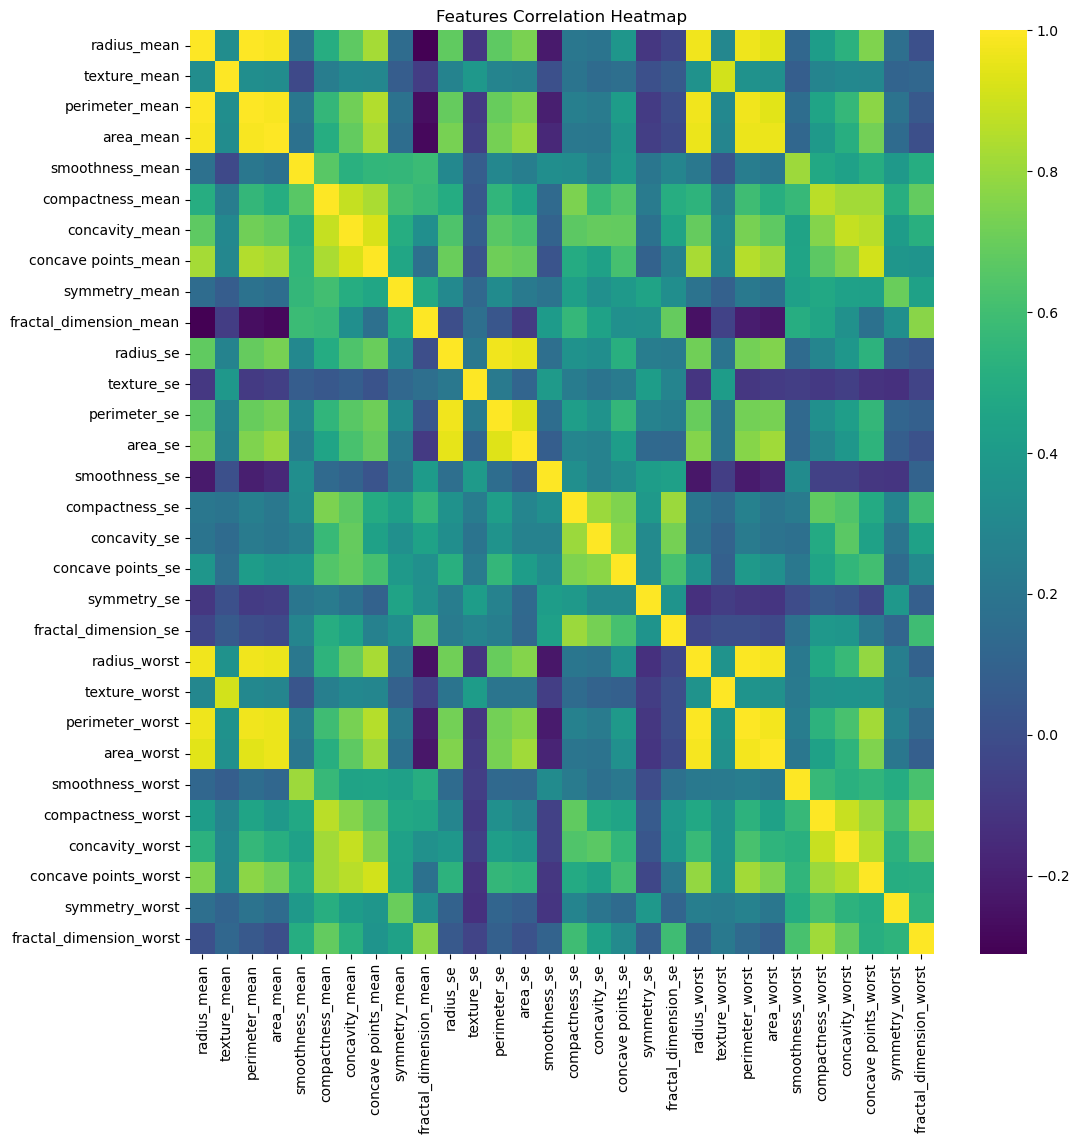

In [7]:
# correlation heatmap
df_features = df.drop(['id', 'diagnosis'], axis=1)
corr_matrix = df_features.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, cmap='viridis', annot=False)
plt.title('Features Correlation Heatmap')
plt.show()

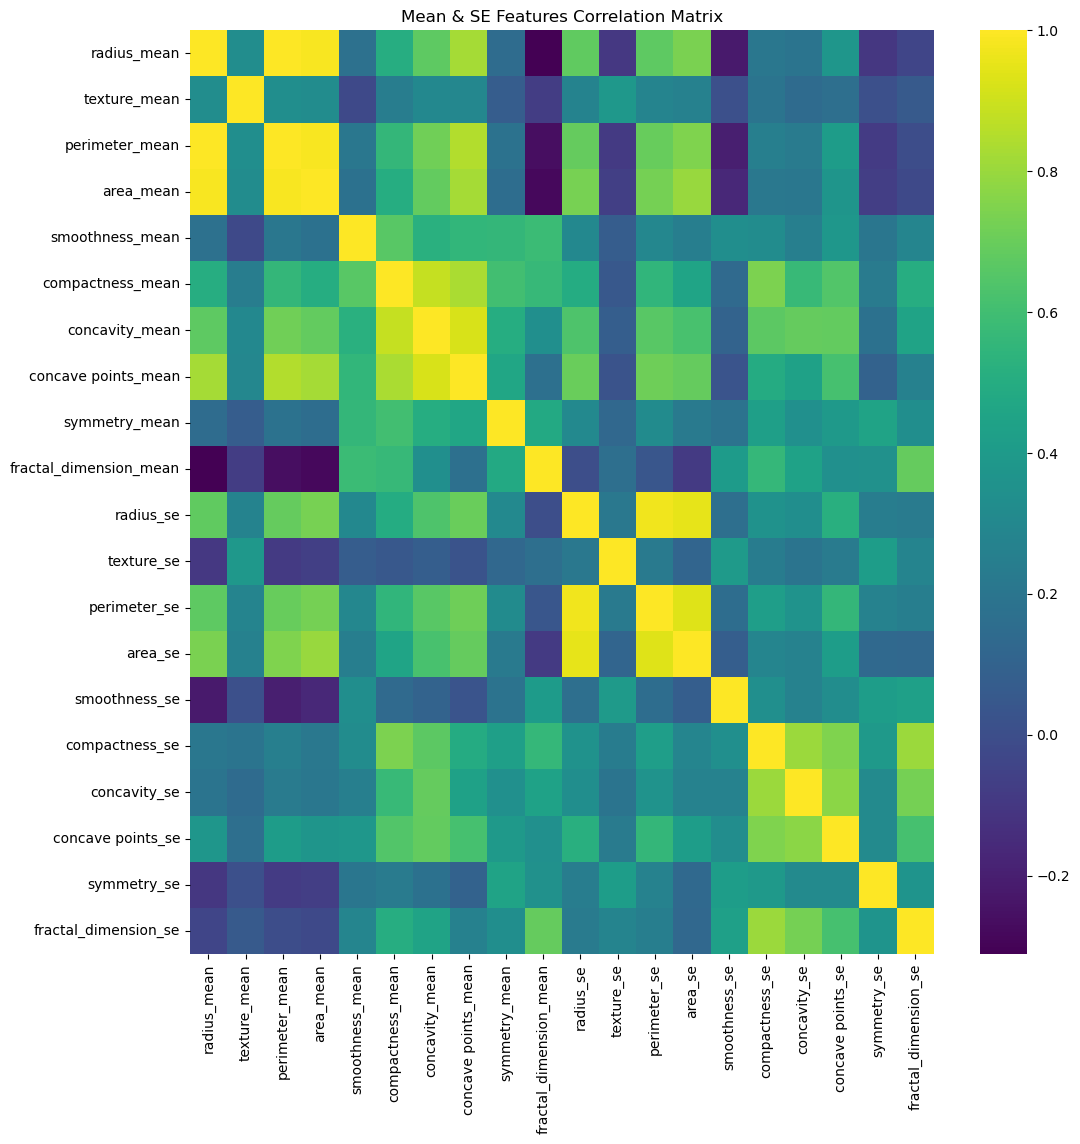

In [8]:
worst_columns = [col for col in df_features.columns if '_worst' in col]
df_features1 = df_features.drop(worst_columns, axis=1)
corr_matrix1 = df_features1.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix1, cmap='viridis', annot=False)
plt.title('Mean & SE Features Correlation Matrix')
plt.show()

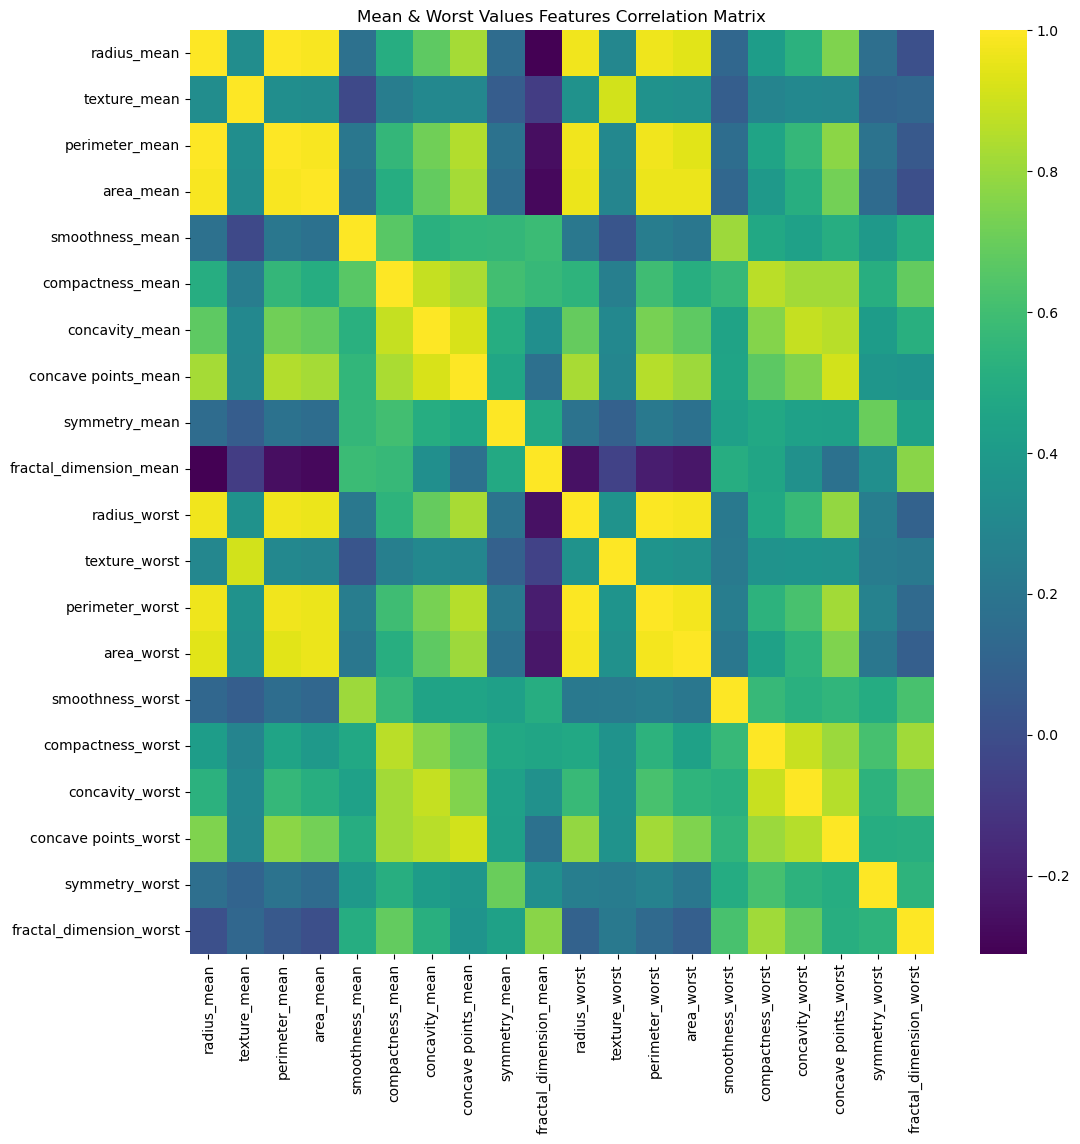

In [9]:
se_columns = [col for col in df_features.columns if '_se' in col]
df_features2 = df_features.drop(se_columns, axis=1)
corr_matrix2 = df_features2.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix2, cmap='viridis', annot=False)
plt.title('Mean & Worst Values Features Correlation Matrix')
plt.show()

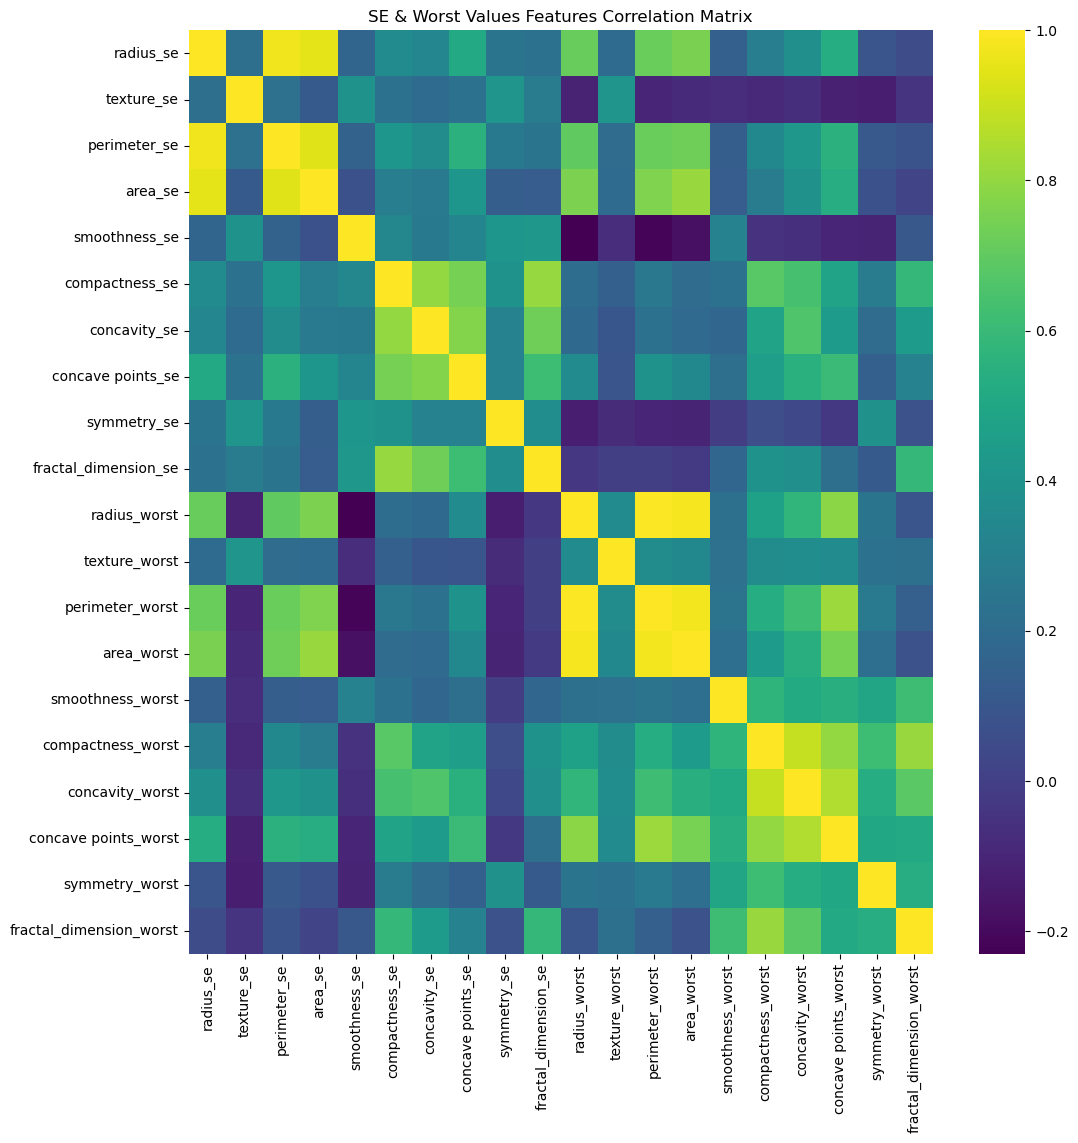

In [10]:
mean_columns = [col for col in df_features.columns if '_mean' in col]
df_features3 = df_features.drop(mean_columns, axis=1)
corr_matrix3 = df_features3.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix3, cmap='viridis', annot=False)
plt.title('SE & Worst Values Features Correlation Matrix')
plt.show()

In [11]:
df_features.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [36]:
#calculating VIF for each feature to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
            'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
            'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 
            'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 
            'symmetry_worst', 'fractal_dimension_worst']
X = add_constant(df_features[features])
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                    Feature          VIF
0                     const  1868.188844
1               radius_mean  3806.115296
2              texture_mean    11.884048
3            perimeter_mean  3786.400419
4                 area_mean   347.878657
5           smoothness_mean     8.194282
6          compactness_mean    50.505168
7            concavity_mean    70.767720
8       concave points_mean    60.041733
9             symmetry_mean     4.220656
10   fractal_dimension_mean    15.756977
11                radius_se    75.462027
12               texture_se     4.205423
13             perimeter_se    70.359695
14                  area_se    41.163091
15            smoothness_se     4.027923
16           compactness_se    15.366324
17             concavity_se    15.694833
18        concave points_se    11.520796
19              symmetry_se     5.175426
20     fractal_dimension_se     9.717987
21             radius_worst   799.105946
22            texture_worst    18.569966
23          peri

#### Using PCA for dimension reduction

In [14]:
# standardizing the features for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95) #n_components=0.95 means 95% of the variance is retained
X_pca = pca.fit_transform(X_scaled)

print("Number of components chosen:", pca.n_components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Number of components chosen: 10
Explained variance ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]


In [16]:
# modelling with pca_transformed features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Accuracy: 0.9824561403508771
Confusion Matrix:
[[70  1]
 [ 1 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [17]:
import joblib
joblib.dump(pca, 'pca_transformer.pkl')
joblib.dump(model, 'logistic_model.pkl')

['logistic_model.pkl']